# Polígonos regulares

*Asume que dispones de las siguientes funciones:*

Función | Descripción
--------|------------
`avanzar(puntos)` | Avanza pintando una línea el número de puntos que indica el argumento.
`girar(angulo)` | Gira los radianes que indica el argumento. Positivo indica giro a la derecha, negativo indica giro a la izquierda.
`comenzar()` | Sitúa el lápiz en el punto de partida sin pintar nada.
`saltar(puntos)` | Avanza sin pintar el número de puntos que indica el argumento.

*Define una función poligono con dos argumentos que indican el número de lados y la longitud del lado respectivamente. La función debe dibujar un polígono regular con el número de lados indicados. Inicialmente el lápiz está orientado hacia la derecha.*

### Ejemplo de funcionamiento:

``` Python
>>> poligono(5, 80)
```

### Solución

Primero copiamos la implementación de las funciones de dibujo.

In [3]:
from IPython.display import SVG
from math import pi, sin, cos

def avanzar(puntos):
    global current_pos, current_drawing
    pos1 = current_pos
    saltar(puntos)
    current_drawing += line(pos1, current_pos)
        
def saltar(puntos):
    global current_pos, current_angle
    x, y = current_pos
    current_pos = x + puntos*cos(current_angle), y + puntos*sin(current_angle)

def girar(radianes):
    global current_angle
    current_angle += radianes

def comenzar():
    global current_pos, current_angle
    current_pos = (200,200)
    current_angle = 0.

def limpiar():
    global current_drawing
    current_drawing = ''
    comenzar()

def dibujo():
    global current_drawing
    ret = SVG('''<svg width="400" height="400" viewBox="0 0 400 400"
                      xmlns="http://www.w3.org/2000/svg">{}</svg>'''\
               .format(current_drawing))
    limpiar()
    return ret

def line(p1, p2):
    (x1, y1), (x2, y2) = p1, p2
    return '''<line x1="{}" y1="{}" 
                    x2="{}" y2="{}" 
                    stroke-width="1" stroke="black"/>'''.format(x1,y1,x2,y2)

limpiar()

La función para crear un polígono es un simple bucle.

In [7]:
from math import pi

def poligono(n, lado):
    for i in range(n):
        avanzar(lado)
        girar(-2*pi/n)

Vamos a probarla.

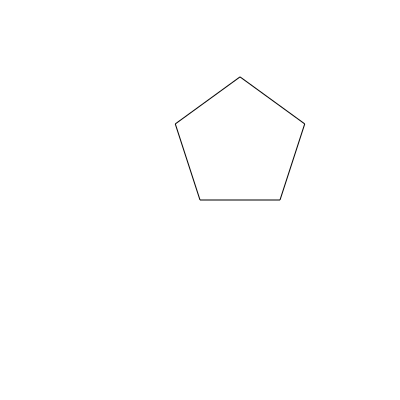

In [8]:
poligono(5,80)
dibujo()

# Estrella cirscunscrita

*Siguiendo con el ejemplo del polígono define una función estrella con dos argumentos (número de lados y longitud de cada segmento) que dibuja una estrella circunscrita en el polígono, como muestran los ejemplos a continuación. Observa que se trata de la estrella resultante de saltar uno de cada dos vértices. Observa también que cuando el número de lados es par la estrella está compuesta por dos líneas poligonales de la mitad de lados.*

*Si solo funciona con número impar de lados se asumirá correcto pero se descontará un 20% de la calificación.*

In [21]:
def estrella(n, lado):
    angulo = -4*pi/n
    if n%2 != 0:
        poligonal(n, lado, angulo)
        return
    poligonal(n//2, lado, angulo)
    siguiente_vertice(n,lado)
    poligonal(n//2, lado, angulo)
    
def poligonal(n,lado,angulo):
    for i in range(n):
        avanzar(lado)
        girar(angulo)

La parte más difícil es cómo viajar hasta el siguiente vértice una vez que hemos terminado de dibujar la primera línea poligonal de las estrellas con n par. Hay que hacer un poco de razonamiento geométrico para 

In [22]:
def siguiente_vertice(n, lado):
    a = pi/n
    girar(a)
    saltar(lado/2/cos(a))
    girar(-3*a)

Y la probamos

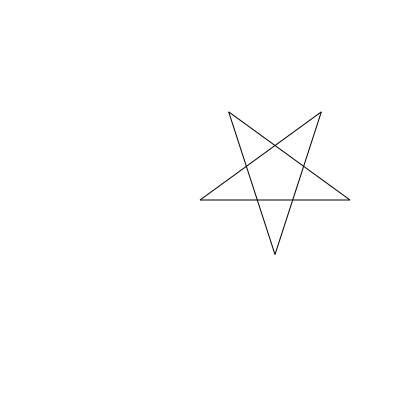

In [23]:
estrella(5,150)
dibujo()

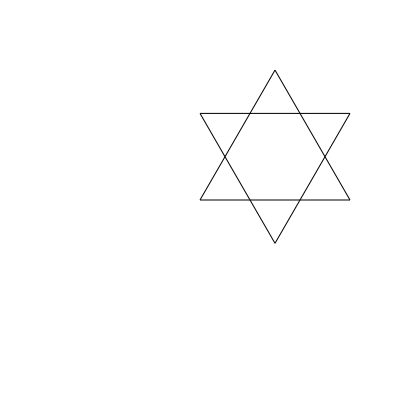

In [26]:
estrella(6,150)
dibujo()

# Mosaicos

*Suponiendo que dispones de la función poligono a la que se refiere el primer ejercicio y las funciones de dibujo descritas en el mismo ejercicio definir una función rosa que dibuja polígonos en cada lado de otro polígono central formando una rosa como la de la figura.*

*La función rosa debe tener dos argumentos similares a los de poligono, es decir, el número de lados y el tamaño del lado.*

### Ejemplo de funcionamiento:

``` Python
>>> rosa(5, 40)
```

### Solución

El problema es completamente análogo a la función que construye el polígono, pero en lugar de avanzar, simplemente llama a `poligono` y avanza un lado, y el giro lo realiza en el otro sentido.

In [32]:
def rosa(n, lado):
    for i in range(n):
        poligono(n, lado)
        saltar(lado)
        girar(2*pi/n)

Vamos a probarla.

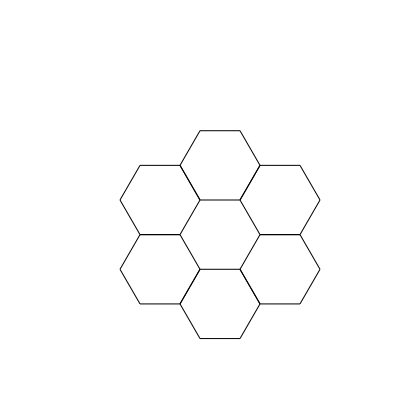

In [33]:
rosa(6,40)
dibujo()

# Curvas fractales

*El copo de nieve de Koch es una curva fractal muy sencilla de obtener con ayuda de una función recursiva.*

*Define una función copo con dos argumentos. El primero es el ancho total del copo de nieve (en puntos), el segundo es un índice que limita la recursión. La función debe dibujar el copo de Koch con las funciones de dibujo descritas en el primer ejercicio.*

### Ejemplo de funcionamiento

*El dibujo siguiente muestra el resultado de `copo(300,n)` con valores para n de 0, 1, 2, 4.*

### Solución

La forma más sencilla es dibujar 3 veces la curva de Koch con distintos ángulos.

In [35]:
from math import pi

def copo(lado, n):
    for i in (0,1,2):
        koch(lado,n)
        girar(2*pi/3)
        
def koch(lado, n):
    if n == 0:
        avanzar(lado)
        return
    for angulo in (-pi/3, 2*pi/3, -pi/3, 0):
        koch(lado/3, n-1)
        girar(angulo)

A probarla.

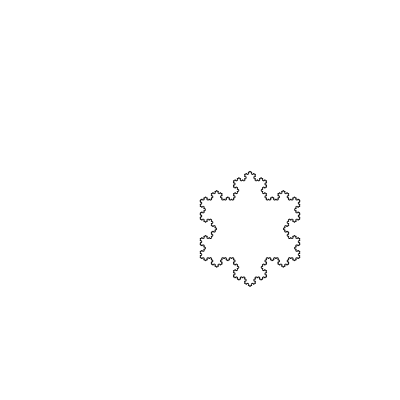

In [42]:
copo(100,4)
dibujo()